In [34]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [40]:
(x_train_all, y_train_all), (x_test, y_test) =keras.datasets.cifar10.load_data()

In [32]:
x_train_all[0].shape

(32, 32, 3)

In [36]:
numbers=np.random.randint(0,50000,10)

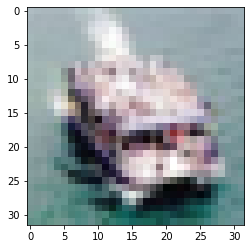

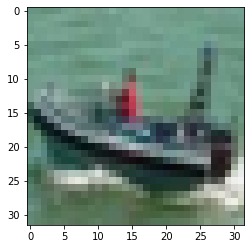

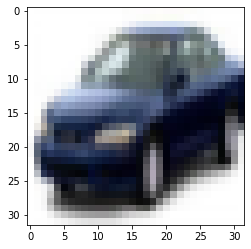

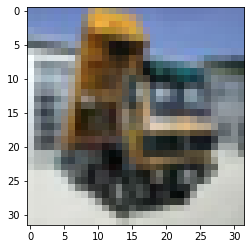

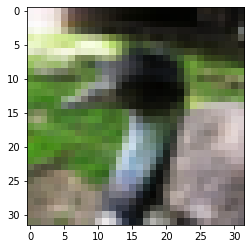

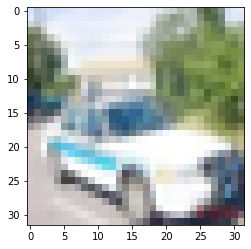

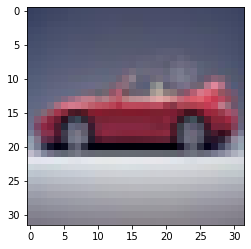

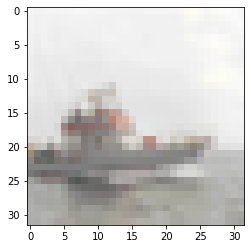

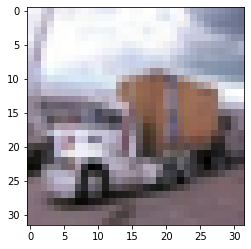

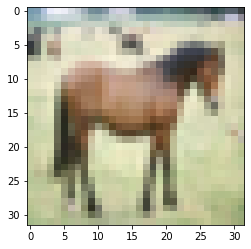

In [38]:
for number in numbers:
    image=x_train_all[number]
    plt.show(plt.imshow(image))

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [44]:
#Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])


best_model = model.fit(x_train, y_train, epochs=50,validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 11s 243us/sample - loss: 2.0483 - accuracy: 0.2712 - val_loss: 1.9722 - val_accuracy: 0.2560
Epoch 2/20
45000/45000 [==============================] - 9s 210us/sample - loss: 1.9474 - accuracy: 0.2564 - val_loss: 1.9275 - val_accuracy: 0.2718
Epoch 3/20
45000/45000 [==============================] - 10s 211us/sample - loss: 1.8893 - accuracy: 0.2871 - val_loss: 1.8623 - val_accuracy: 0.3066
Epoch 4/20
45000/45000 [==============================] - 11s 236us/sample - loss: 1.8466 - accuracy: 0.3092 - val_loss: 1.8115 - val_accuracy: 0.3156
Epoch 5/20
45000/45000 [==============================] - 10s 215us/sample - loss: 1.8240 - accuracy: 0.3229 - val_loss: 1.8265 - val_accuracy: 0.3204
Epoch 6/20
45000/45000 [==============================] - 9s 208us/sample - loss: 1.7920 - accuracy: 0.3432 - val_loss: 1.7689 - val_accuracy: 0.3440
Epoch 7/20
45000/45000 [=======================

In [45]:
#add batch normalization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
model.add(keras.layers.BatchNormalization())

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])


best_model = model.fit(x_train, y_train, epochs=50,validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 34s 760us/sample - loss: 1.9206 - accuracy: 0.3117 - val_loss: 1.7504 - val_accuracy: 0.3828
Epoch 2/50
45000/45000 [==============================] - 27s 606us/sample - loss: 1.7290 - accuracy: 0.3840 - val_loss: 1.6842 - val_accuracy: 0.3886
Epoch 3/50
45000/45000 [==============================] - 29s 634us/sample - loss: 1.6638 - accuracy: 0.4091 - val_loss: 1.5861 - val_accuracy: 0.4202
Epoch 4/50
45000/45000 [==============================] - 27s 601us/sample - loss: 1.6100 - accuracy: 0.4311 - val_loss: 1.5756 - val_accuracy: 0.4434
Epoch 5/50
45000/45000 [==============================] - 28s 623us/sample - loss: 1.5686 - accuracy: 0.4441 - val_loss: 1.4948 - val_accuracy: 0.4616
Epoch 6/50
45000/45000 [==============================] - 28s 616us/sample - loss: 1.5312 - accuracy: 0.4640 - val_loss: 1.4780 - val_accuracy: 0.4856
Epoch 7/50
45000/45000 [=====================

In [49]:
#the model is converging faster with batch normalization


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [52]:
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])


best_model = model.fit(x_train_scaled, y_train, epochs=50,validation_data=(x_valid_scaled, y_valid),
                    callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 45s 1ms/sample - loss: 1.9688 - accuracy: 0.2374 - val_loss: 1.8766 - val_accuracy: 0.2846
Epoch 2/50
45000/45000 [==============================] - 15s 341us/sample - loss: 3.3378 - accuracy: 0.2927 - val_loss: 1.8750 - val_accuracy: 0.2918
Epoch 3/50
45000/45000 [==============================] - 16s 361us/sample - loss: 1.8187 - accuracy: 0.3116 - val_loss: 1.8318 - val_accuracy: 0.3174
Epoch 4/50
45000/45000 [==============================] - 16s 348us/sample - loss: 1.7702 - accuracy: 0.3302 - val_loss: 1.7467 - val_accuracy: 0.3468
Epoch 5/50
45000/45000 [==============================] - 16s 348us/sample - loss: 1.7264 - accuracy: 0.3504 - val_loss: 1.7357 - val_accuracy: 0.3550
Epoch 6/50
45000/45000 [==============================] - 16s 350us/sample - loss: 1.8106 - accuracy: 0.3235 - val_loss: 1.7369 - val_accuracy: 0.3484
Epoch 7/50
45000/45000 [=======================